In [1]:
import pandas
df = pandas.read_excel('data/yahoo_movie.xlsx', index_col=0)

In [7]:
df.head()

,content,stars,title,status
0,"不知道耶! 看完整個無感\r\n有種覺得就是女兒""給蕭""害死了老爸\r\n然後...既然可以...",3,古墓奇兵,soso
1,很好看的動作片，不會浪費錢跟時間。很久沒有這樣的探險片。可說是女版的印第安那瓊。女主角跟爸爸...,5,古墓奇兵,good
2,說這個不好看的話，那我還真不知道，還有什麼片是您可以去看得了。電影好看，但話說羅拉有裝可以撿...,5,古墓奇兵,good
3,父女重逢真的很讓人感動，五顆星。,5,古墓奇兵,good
4,劇情雖然老套，但仍拍出新意，古墓能殺人的方式不就是機關和毒，要求亂七八糟的觀眾，你看喪尸片看多了。,4,古墓奇兵,good


In [8]:
import jieba
corpus = []
tags   = []
for rec in df[df['status'].isin(['good', 'bad'])].iterrows():
    corpus.append(' '.join(jieba.cut(rec[1].content)))
    tags.append(rec[1].status)

In [4]:
corpus[0]

'不 知道 耶 !   看 完整 個 無感 \r\n 有 種 覺得 就是 女兒 " 給 蕭 " 害死 了 老爸 \r\n 然後 ... 既然 可以 搭 飛機 離開 \r\n 那一 開始 為什麼 不 搭 飛機 進去 就 好 ? \r\n 然後 島 就 那麼 一丁點 大 ， 人 在 那邊 待了 七年 了 ， 即使 沒有 拿到 答案 ， 也 沒辦法 發現 那 個 入口 嗎 ? ? \r\n 總 覺得 有點 扯 就是 了 ~ ~ \r\n 然後 可能 片長 太長 了 ， 古墓 裡 的 機關 ... 也 感覺 太 好過 了 的 感覺 ...'

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [10]:
X.shape

(980, 4839)

In [12]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(X, tags)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [13]:
def softmax(e):
    return np.exp(e) / np.exp(e).sum() 
    
import numpy as np
a = np.array([2,7,1])

In [14]:
softmax(a)

array([0.00667641, 0.99086747, 0.00245611])

In [15]:
b = np.array([0.00667641, 0.99086747, 0.00245611])
b.sum()

0.99999999

In [16]:
c = np.array([0,1,0])
b - c

array([ 0.00667641, -0.00913253,  0.00245611])

In [17]:
def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

    
import numpy as np
a = np.array([2,7,1])

In [18]:
sigmoid_function(a)

array([0.88079708, 0.99908895, 0.73105858])

## 安裝 GENSIM

In [19]:
! pip install gensim

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [41]:
s = 'you say goodby and i say hello .'

from gensim.models import word2vec
model = word2vec.Word2Vec([s.split()], min_count=1, size=3) 

In [42]:
model

In [43]:
model.wv.vectors.shape

(7, 3)

In [44]:
model.wv.vectors

array([[-0.13190594,  0.11762448, -0.00629038],
       [-0.06928848,  0.12338193, -0.01034341],
       [-0.14628631, -0.14990619, -0.13047887],
       [ 0.1657063 , -0.03076699, -0.09294317],
       [-0.14430211,  0.16298111, -0.10189454],
       [-0.08324675,  0.04580065, -0.10287556],
       [-0.00766116, -0.12512954,  0.13616468]], dtype=float32)

In [45]:
model.wv.vocab

{'you': <gensim.models.keyedvectors.Vocab at 0x129553048>,
 'say': <gensim.models.keyedvectors.Vocab at 0x129553208>,
 'goodby': <gensim.models.keyedvectors.Vocab at 0x129553240>,
 'and': <gensim.models.keyedvectors.Vocab at 0x1295532b0>,
 'i': <gensim.models.keyedvectors.Vocab at 0x1295532e8>,
 'hello': <gensim.models.keyedvectors.Vocab at 0x129553320>,
 '.': <gensim.models.keyedvectors.Vocab at 0x129553358>}

In [46]:
s = 'you say goodby and i say hello .'

from gensim.models import word2vec
model = word2vec.Word2Vec([s.split()], min_count=1, size=2) 

In [47]:
model.wv.vectors

array([[-0.19785893,  0.17643672],
       [-0.10393272,  0.18507288],
       [-0.21942945, -0.22485928],
       [ 0.24855947, -0.04615048],
       [-0.21645318,  0.24447167],
       [-0.12487013,  0.06870098],
       [-0.01149174, -0.18769431]], dtype=float32)

In [52]:
model.wv.vocab.keys()

dict_keys(['you', 'say', 'goodby', 'and', 'i', 'hello', '.'])

In [48]:
X = model.wv.vectors

Populating the interactive namespace from numpy and matplotlib


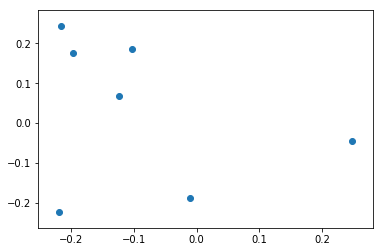

In [50]:
%pylab inline
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1])

Populating the interactive namespace from numpy and matplotlib


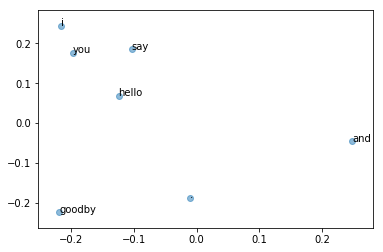

In [58]:
%pylab inline
from matplotlib import pyplot as plt
words = list(model.wv.vocab.keys())
for i in range(len(words)):
    #print(words[i])
    plt.annotate(words[i], (X[i, 0], X[i, 1]))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()

In [59]:
model.most_similar('you')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('i', 0.9774017333984375),
 ('say', 0.9457564353942871),
 ('hello', 0.8493059277534485),
 ('goodby', -0.2820505201816559),
 ('and', -0.6405924558639526),
 ('.', -0.8403661847114563)]

In [60]:
import pandas
df = pandas.read_excel('data/yahoo_movie.xlsx', index_col=0)

In [64]:
corpus = []
for e in df['content'].tolist():
    corpus.append(list(jieba.cut(e)))

In [72]:
from gensim.models import word2vec
model = word2vec.Word2Vec(corpus, min_count=10, size=50, iter=100) 

In [71]:
?word2vec.Word2Vec
#model.wv.vocab

In [79]:
model.most_similar('漫威')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('階段', 0.594322144985199),
 ('漫畫', 0.5740862488746643),
 ('系列', 0.5428863763809204),
 ('為', 0.4735868573188782),
 ('本片', 0.4690867066383362),
 ('原力', 0.4529591500759125),
 ('已', 0.4433327913284302),
 ('年', 0.4420661926269531),
 ('；', 0.43081504106521606),
 ('作品', 0.4270137846469879)]

In [75]:
#model.wv.vocab